In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 

In [2]:
iris_data=load_iris()
X_train,X_test,y_train,y_test=\
train_test_split(
    iris_data.data
    ,iris_data.target
    ,test_size=0.2
    ,random_state=11
)

In [3]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(
    X_train
    ,y_train
)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
      dt_clf #학습한 모델
    , out_file='tree.dot'
    , class_names=iris_data.target_names
    , feature_names=iris_data.feature_names
    , impurity=True
    , filled=True
)

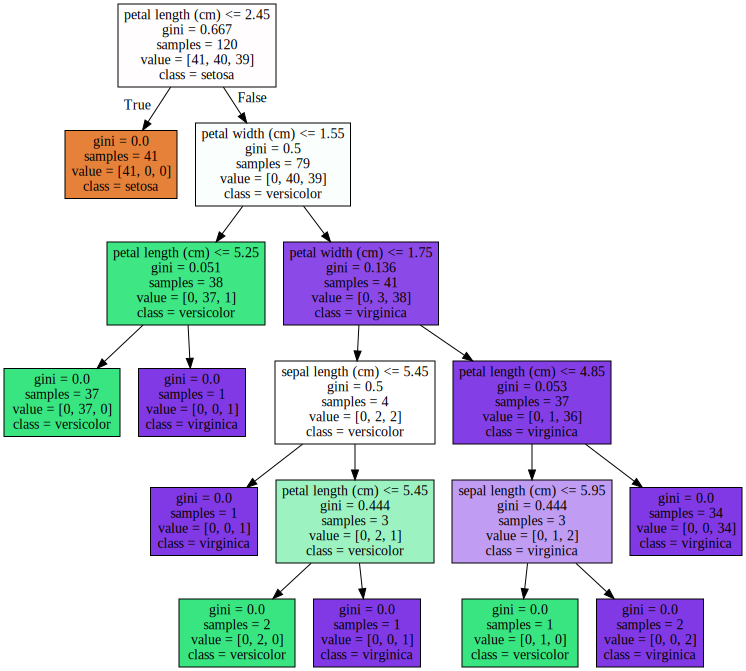

In [5]:
import graphviz
with open('tree.dot') as f:
    dot_graph=f.read() 
    
graphviz.Source(dot_graph)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [8]:
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

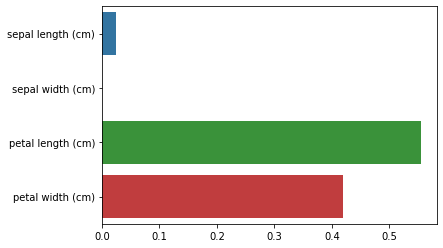

In [9]:
sns.barplot(
    x=dt_clf.feature_importances_
    ,y=iris_data.feature_names  
)

### 결정 트리 과적합 예제

In [10]:
from sklearn.datasets import make_classification

X_features,y_labels = make_classification(
    n_features=2, n_redundant=0,n_informative=2,
    n_classes=3,n_clusters_per_class=1,random_state=0
)

In [11]:
X_features[:5],y_labels[:5]

(array([[ 0.12041909, -1.68941375],
        [ 1.09665605,  1.79445113],
        [ 0.88426577,  1.43370121],
        [ 0.95048011, -0.56202253],
        [ 1.04421447,  0.02899023]]),
 array([0, 1, 1, 1, 2]))

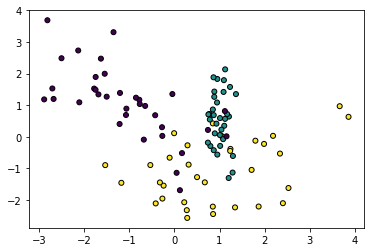

In [12]:
plt.scatter(
    X_features[ : , 0] 
    ,X_features[ : , 1]  
    ,marker='o'
    ,c=y_labels 
    ,s=25
    ,edgecolors='k'
)

### 결정트리 실습

In [13]:
feature_name_df = pd.read_csv(
    'D:/shinj/Data/[5]UCI-Human-Activity-Recognition/HAR/features.txt'
    ,sep='\s+'
    ,header=None
    ,names=['colum_index','colum_name']
)
feature_name_df.head()

,colum_index,colum_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [14]:
feature_name=feature_name_df.iloc[ : ,1].values.tolist()

In [15]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [24]:
def get_human_dataset():
    feature_name_df=\
    pd.read_csv(
        'D:/shinj/Data/[5]UCI-Human-Activity-Recognition/HAR/features.txt'
        ,sep='\s+'
        ,header=None
        ,names=['colum_index','colum_name']
    )
    fn = feature_name_df.iloc[:,1].values.tolist()
    
    X_train=pd.read_csv(
        'D:/shinj/Data/[5]UCI-Human-Activity-Recognition/HAR/train/X_train.txt'
        ,sep='\s+'
        ,header=None
    )
    
    X_test=pd.read_csv(
        'D:/shinj/Data/[5]UCI-Human-Activity-Recognition/HAR/test/X_test.txt'
        ,sep='\s+'
        ,header=None
    )
    
    y_train=pd.read_csv(
        'D:/shinj/Data/[5]UCI-Human-Activity-Recognition/HAR/train/y_train.txt'
        ,sep='\s+'
        ,names=['action']
    )
    
    y_test=pd.read_csv(
        'D:/shinj/Data/[5]UCI-Human-Activity-Recognition/HAR/test/y_test.txt'
        ,sep='\s+'
        ,names=['action']
    )
    
    return X_train,X_test,y_train,y_test

In [25]:
X_train,X_test,y_train,y_test = get_human_dataset()

In [26]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [27]:
feature_name=feature_name_df.iloc[ : ,1].values.tolist()
X_train.columns=feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [28]:
X_test.columns=feature_name
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [29]:
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


In [30]:
y_test.head()

,action
0,5
1,5
2,5
3,5
4,5


In [31]:
type(y_test)

pandas.core.frame.DataFrame

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score #평가: 정확도

In [34]:
#Model
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accu = accuracy_score(y_test, pred)
print('결정트리 예측 정확도 : {0:.4f}'.format(accu))

결정트리 예측 정확도 : 0.8548


In [35]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 156,
 'splitter': 'best'}

In [41]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [4,6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(
    dt_clf
    ,param_grid=params
    ,scoring = 'accuracy'
    ,cv=5
    ,verbose=1 
)
#학습시작
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [4, 6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [42]:
grid_cv.best_score_

0.8513444970102249

In [44]:
grid_cv.best_params_

{'max_depth': 16}

In [45]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [46]:
cv_results_df[[ 'param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,4,0.843178
1,6,0.850791
2,8,0.851069
3,10,0.851209
4,12,0.844135
5,16,0.851344
6,20,0.850800
7,24,0.849440


In [50]:
max_depths = [4,6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(
        max_depth=depth, random_state=156
    )
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accu = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:4f}'.format(depth,accu))

max_depth = 4 정확도 : 0.809637
max_depth = 6 정확도 : 0.855786
max_depth = 8 정확도 : 0.870716
max_depth = 10 정확도 : 0.867323
max_depth = 12 정확도 : 0.864608
max_depth = 16 정확도 : 0.857482
max_depth = 20 정확도 : 0.854768
max_depth = 24 정확도 : 0.854768


In [55]:
params = {
     'max_depth' : [8,10,12,16,20] 
    ,'min_samples_split': [14,16,20,24] 
}

grid_cv = GridSearchCV(
     dt_clf
    ,param_grid=params
    ,scoring='accuracy'
    ,cv=5 #보통 5,홀수
    ,verbose=1
)

grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=156),
             param_grid={'max_depth': [8, 10, 12, 16, 20],
                         'min_samples_split': [14, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [56]:
grid_cv.best_score_

0.8552873005082386

In [57]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 14}

In [61]:
best_grid_clf = grid_cv.best_estimator_
pred = best_grid_clf.predict(X_test)
accuracy_score(y_test,pred)

0.8727519511367492

In [64]:
import seaborn as sns

ftr_imp_values = best_grid_clf.feature_importances_
len(ftr_imp_values), type(ftr_imp_values)

(561, numpy.ndarray)

In [65]:
ftr_imp = pd.Series(
     ftr_imp_values
    ,index = X_train.columns
)

In [66]:
ftr_top20 = ftr_imp.sort_values(ascending=False)[:20]

In [67]:
ftr_top20

tGravityAcc-min()-X                0.253242
fBodyAccJerk-bandsEnergy()-1,16    0.212489
angle(Y,gravityMean)               0.138939
fBodyAccMag-energy()               0.115427
tGravityAcc-arCoeff()-Z,2          0.101840
fBodyGyro-maxInds-X                0.023960
tBodyGyro-correlation()-Y,Z        0.016506
tGravityAcc-energy()-Y             0.016426
tGravityAccMag-arCoeff()1          0.012607
tBodyAcc-correlation()-X,Y         0.009351
fBodyAcc-max()-Y                   0.008821
tBodyGyro-max()-X                  0.008546
tGravityAcc-max()-Y                0.006288
tGravityAcc-min()-Y                0.006111
fBodyGyro-max()-X                  0.005244
tBodyGyro-min()-X                  0.004371
tBodyAccJerk-correlation()-X,Y     0.003965
tBodyGyroJerk-max()-X              0.003470
tBodyAccMag-arCoeff()1             0.003128
tGravityAcc-arCoeff()-Y,3          0.003023
dtype: float64

<AxesSubplot:>

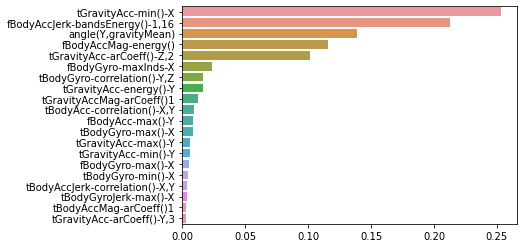

In [68]:
sns.barplot(
     x=ftr_top20
    ,y=ftr_top20.index #피쳐명
)